# Mission 1
Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

analyse de l'éboulis des valeurs propres ;
représentation des variables par le cercle des corrélations ;
représentation des individus par les plans factoriels ;
analyser de la qualité de représentation et la contribution des individus.
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#import time

from P6_Functions import *
#from sklearn import metrics
#from scipy.stats import loguniform
#from sklearn.cluster import KMeans
#from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import silhouette_samples, silhouette_score, plot_confusion_matrix
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#4cb2ff', '#61ba86'])

In [3]:
df = pd.read_csv('datas/notes.csv' , header=0, sep=",", decimal=".")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


# L'ACP
En fait, l’ACP est une méthode bien connue de réduction de dimension qui va permettre de transformer des variables très corrélées en nouvelles variables décorrélées les unes des autres. 

**Le principe est simple** : Il s’agit en fait de résumer l’information qui est contenue dans une large base de données en un certain nombre de variables synthétiques appelées : Composantes principales. 

**L’idée** est  de pouvoir projeter ces données sur l’hyperplan le plus proche afin d’avoir une représentation simple de nos données.
Évidemment, qui dit réduction de dimension dit perte d’informations. C’est là tout l’enjeu que représente une Analyse en Composantes principales. Il faut pouvoir réduire la dimension de nos données tout en conservant un maximum d’informations.

**Comment fonctionne une Analyse en composantes principales ?**

Il est important de centrer et réduire nos variables pour atténuer l’effet d’échelle car elles ne sont pas calculées sur la même base.
Il faut voir nos données comme une matrice à partir de laquelle nous allons calculer des valeurs propres et vecteurs propres.

En algèbre linéaire, la notion de vecteur propre(eigenvector) correspond à l’étude des axes privilégiés, selon lesquels une application d’un espace dans lui-même se comporte comme une dilatation, multipliant les vecteurs par une  constante appelée valeur propre(eigenvalue). Les vecteurs auxquels il s’applique s’appellent vecteurs propres, réunis en un espace propre

## Preprocessing

[ 47.44792058  69.40502654  83.63955087  92.16584631  96.77866875
 100.        ]


array([47.44792058, 21.95710596, 14.23452433,  8.52629544,  4.61282244,
        3.22133125])

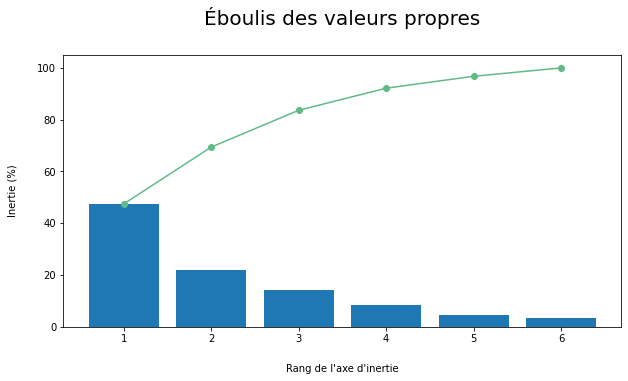

In [4]:
# choix du nombre de composantes à calculer
n_comp = 6

# select columns for CPA
df = df.set_index('is_genuine')
df_pca = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

#data preparation for PCA
X = df_pca.values
names = df.index # ou data['columns'] pour avoir les intitulés
features = df.columns

#centering but no reduction because the data already has the same unit

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)#ici

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

display_scree_plot(pca)
plt.savefig("graphiques\05. Screeplot.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
scree = pca.explained_variance_ratio_*100      #Le paramètre pca.explained_variance_ratio_ renvoie un vecteur de la variance expliquée par chaque dimension.
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree 


La méthode du coude précise une représentation satisfaisante de nos variables sur les deux premières composantes principales, le premier axe factoriel.

70% de la variance des données est expliquée par les deux premières composantes. L'analyse sera traitée ainsi, car l'ajout d'autres composantes n'apporte pas réellement de valeur ajoutée, du moins pas dans notre contexte actuel.


## Cercle des corrélations et projection des individus

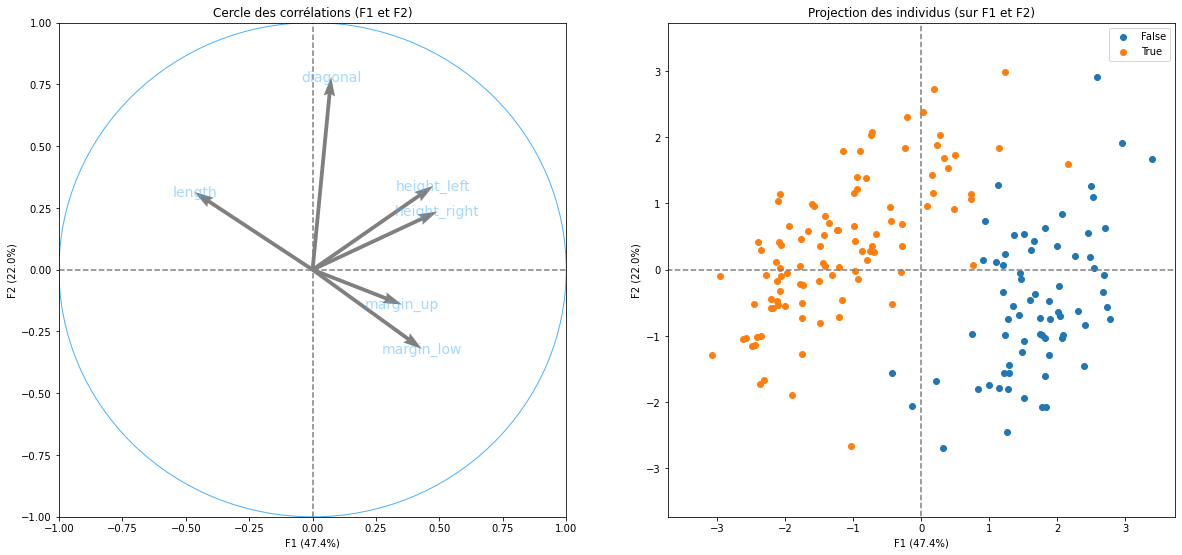

In [5]:
#circles of correlations
pcs = pca.components_

#projection
X_projected = pca.transform(X_scaled)

#figure initialization
plt.figure(figsize=(20,20))
    
plt.subplot(2, 2, 1)
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
    
plt.subplot(2, 2, 2)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = df.index) 
